In [112]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.ticker import MaxNLocator, MultipleLocator

print(yf.__version__)

0.2.66


In [113]:
aapl = yf.Ticker("AAPL")
a = '1y'
data = aapl.history(period = a)
print(data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2024-11-08 00:00:00-05:00  226.366414  227.851149  225.609108  226.157166   
2024-11-11 00:00:00-05:00  224.204094  224.901615  220.716475  223.436813   
2024-11-12 00:00:00-05:00  223.755689  224.792003  222.569896  223.436813   
2024-11-13 00:00:00-05:00  223.217580  225.848241  221.972002  224.323654   
2024-11-14 00:00:00-05:00  224.224042  228.060414  224.204109  227.412720   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-11-08 00:00:00-05:00  38328800       0.25           0.0  
2024-11-11 00:00:00-05:00  42005600       0.00           0.0  
2024-11-12 00:00:00-05:00  40398300       0.00           0.0  
2024-11-13 00:00:00-05:00  48566200       0.00           0.0  
2024-11-14 00:00:00-05:00  44923900       0.00           0.0  


In [114]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

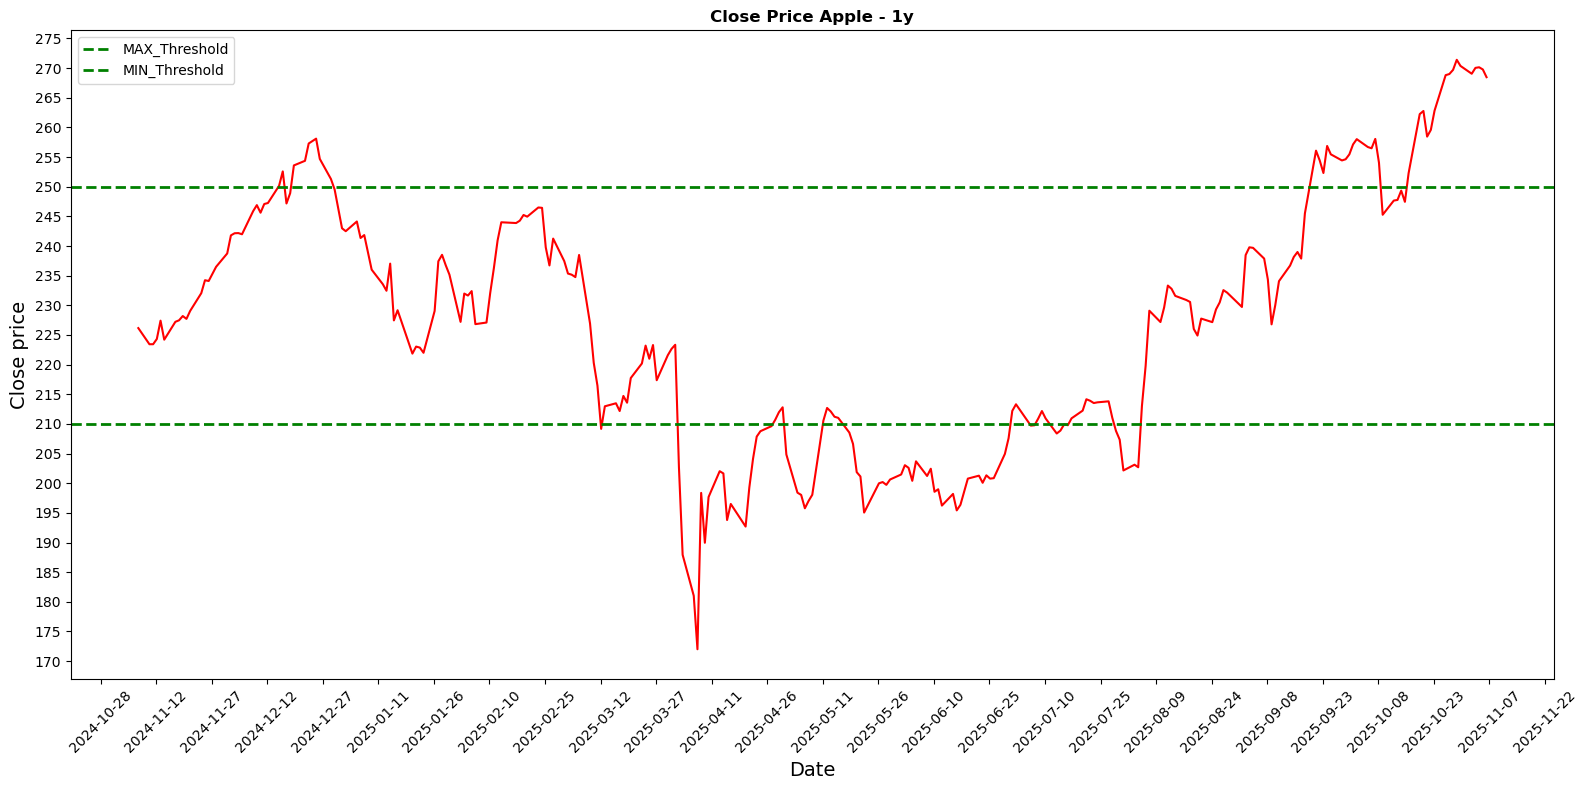

In [115]:
fig,ax = plt.subplots(1,1, figsize = (16,8), dpi = 100)
plt.plot(data.index,data["Close"], color = "red")
plt.title("Close Price Apple - %s" %a, fontweight = 'bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close price", fontsize=14)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.axhline(y=250, color='green', linestyle='--', linewidth=2, label='MAX_Threshold')
plt.axhline(y=210, color='green', linestyle='--', linewidth=2, label='MIN_Threshold')


ax.yaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_locator(MaxNLocator(30))
plt.tight_layout()
plt.legend()
plt.show()


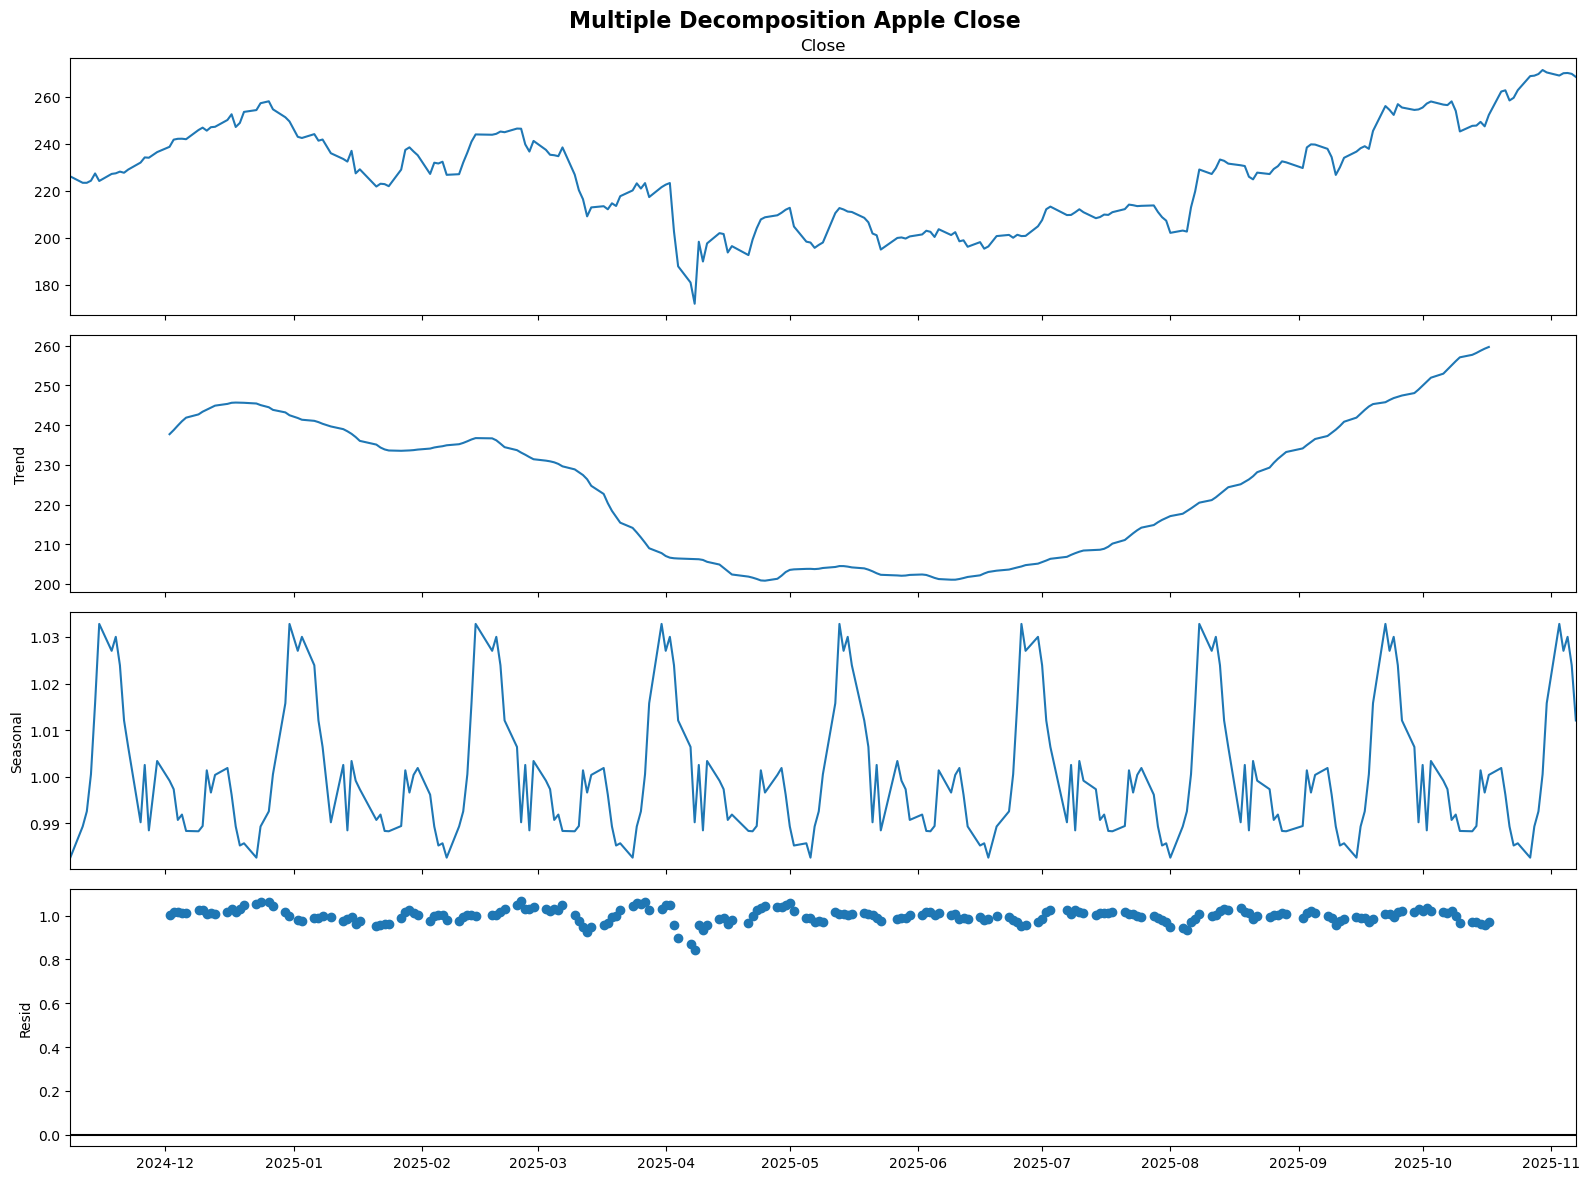

In [116]:
mult_decomp = seasonal_decompose(data["Close"], model = 'multiplicative', period = 30)

plt.rcParams.update({'figure.figsize': (16,12)})
mult_decomp.plot().suptitle('Multiple Decomposition Apple Close', fontweight = 'bold', fontsize = 16)
plt.tight_layout()
plt.show()

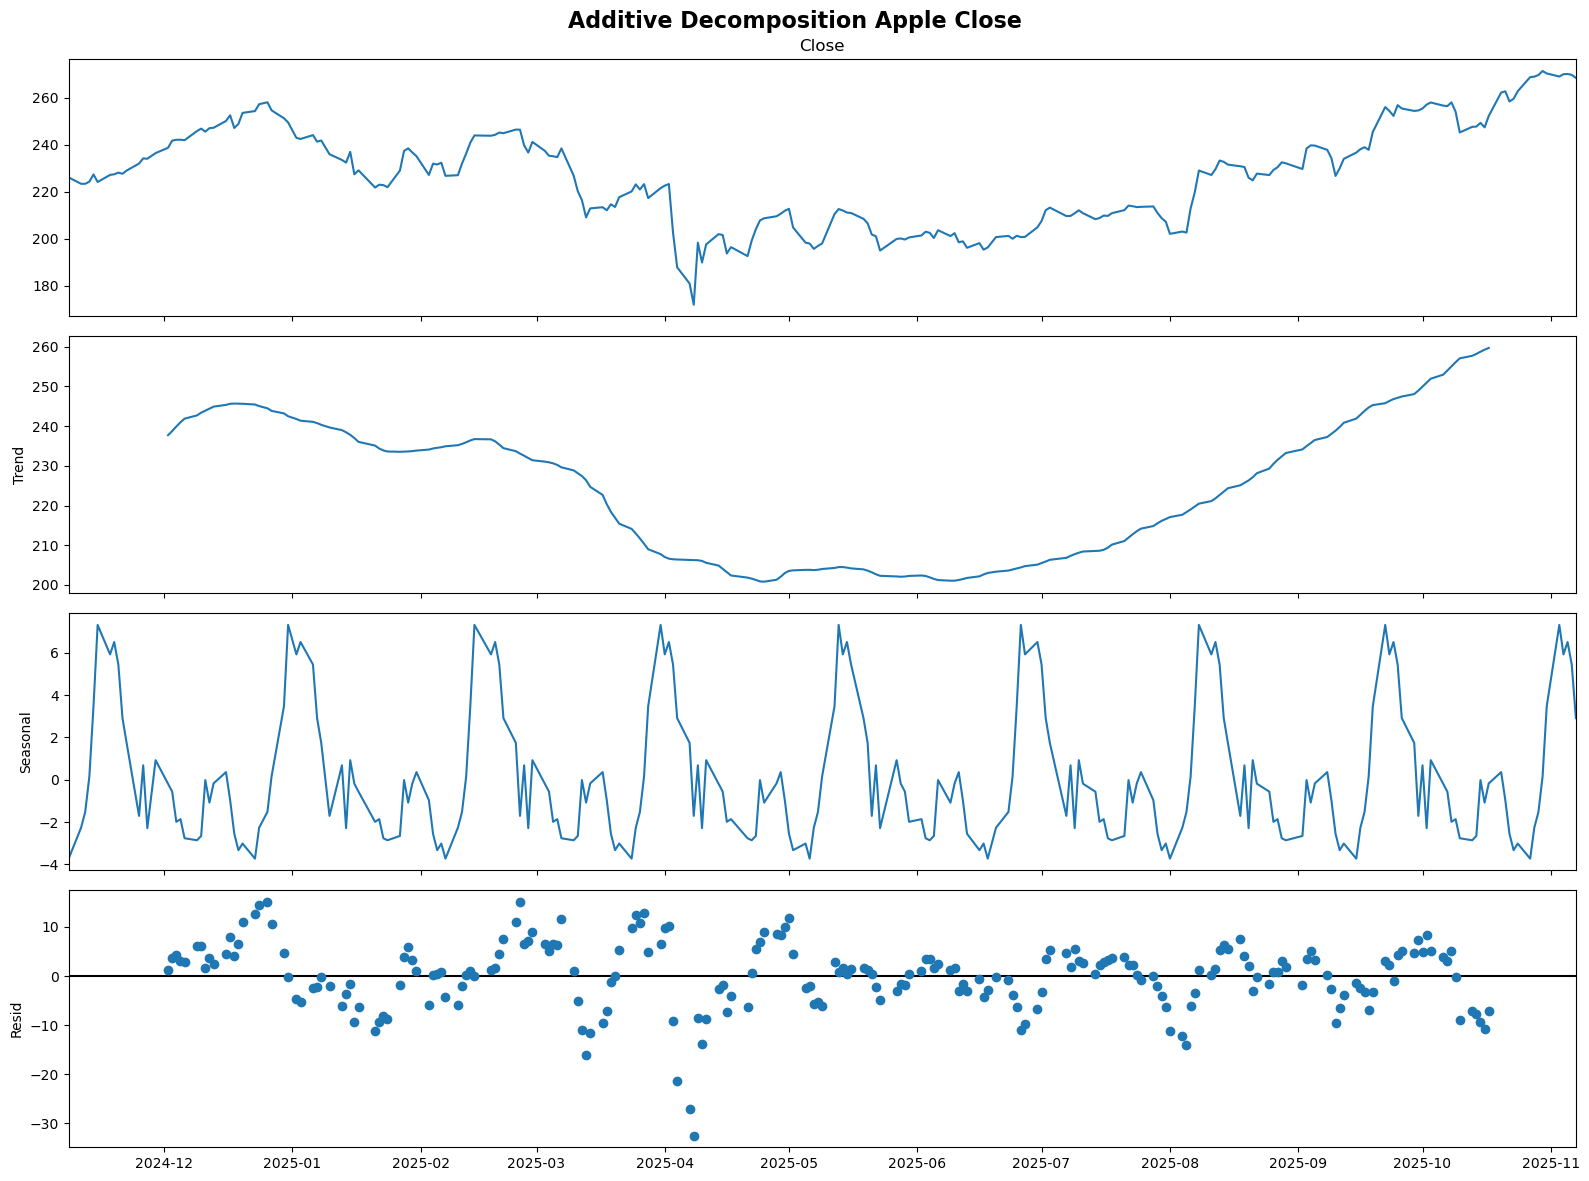

In [117]:
add_decomp = seasonal_decompose(data["Close"], model = 'additive', period = 30)

plt.rcParams.update({'figure.figsize': (16,12)})
add_decomp.plot().suptitle('Additive Decomposition Apple Close', fontweight = 'bold', fontsize = 16)
plt.tight_layout()

plt.show()

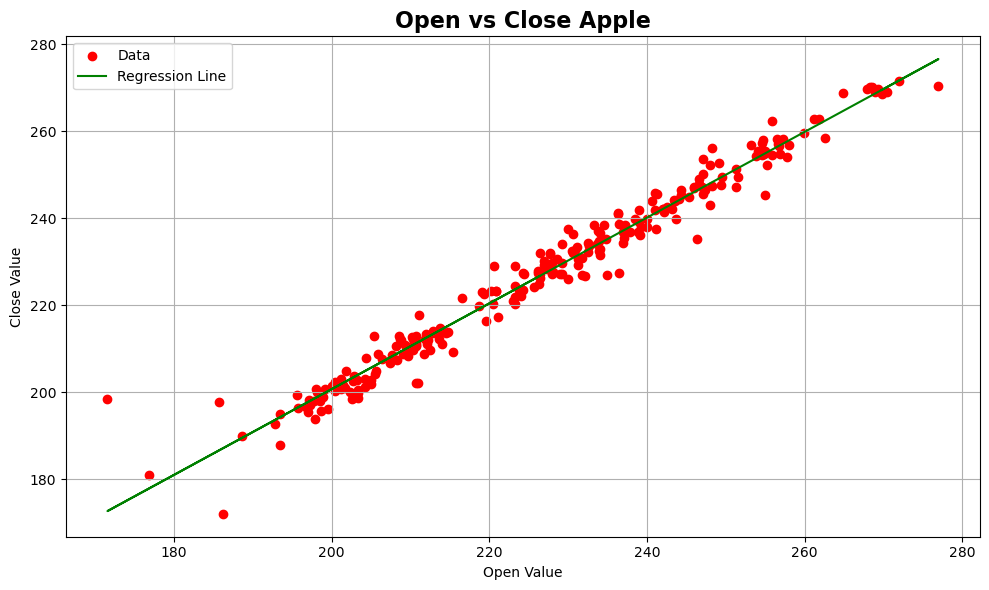

In [118]:
fig, ax = plt.subplots(1,1,figsize = (10,6), dpi = 100)
plt.scatter(data["Open"], data['Close'], color = 'red', label = "Data")

m, b = np.polyfit(data["Open"], data['Close'], 1)
plt.plot(data["Open"], m*data["Open"] + b, color='green', label='Regression Line')

plt.xlabel("Open Value")
plt.ylabel("Close Value")
plt.title("Open vs Close Apple", fontweight = 'bold', fontsize = 16)
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

In [119]:
data.head(), data.shape

(                                 Open        High         Low       Close  \
 Date                                                                        
 2024-11-08 00:00:00-05:00  226.366414  227.851149  225.609108  226.157166   
 2024-11-11 00:00:00-05:00  224.204094  224.901615  220.716475  223.436813   
 2024-11-12 00:00:00-05:00  223.755689  224.792003  222.569896  223.436813   
 2024-11-13 00:00:00-05:00  223.217580  225.848241  221.972002  224.323654   
 2024-11-14 00:00:00-05:00  224.224042  228.060414  224.204109  227.412720   
 
                              Volume  Dividends  Stock Splits  
 Date                                                          
 2024-11-08 00:00:00-05:00  38328800       0.25           0.0  
 2024-11-11 00:00:00-05:00  42005600       0.00           0.0  
 2024-11-12 00:00:00-05:00  40398300       0.00           0.0  
 2024-11-13 00:00:00-05:00  48566200       0.00           0.0  
 2024-11-14 00:00:00-05:00  44923900       0.00           0.0  ,
 (2

In [120]:
np.random.seed(42)

steps = np.random.standard_normal(size = 1000)
steps[0] = 0

random_walk = np.cumsum(steps)

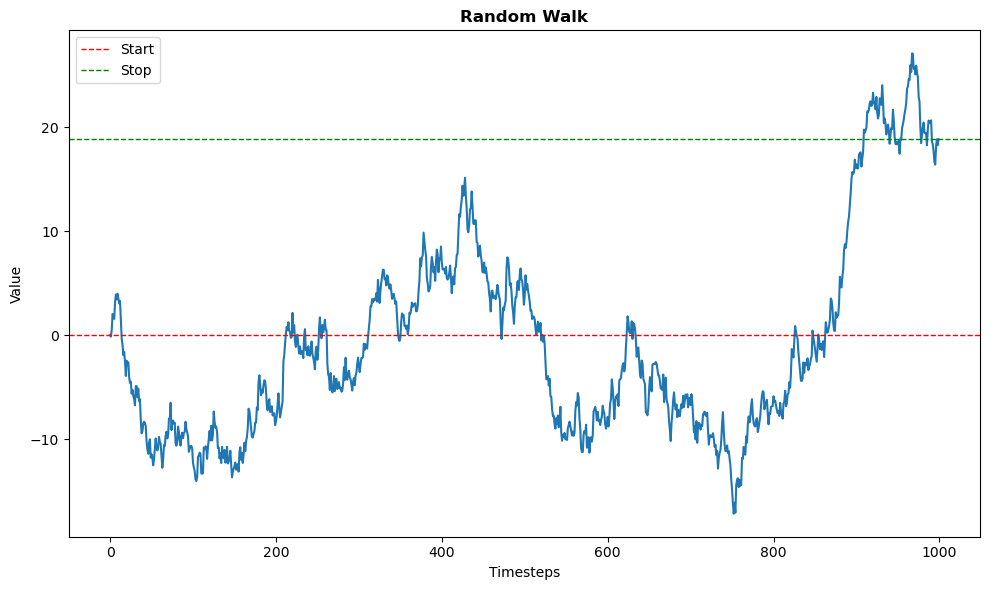

In [121]:
fig, ax = plt.subplots(1,1, figsize = (10,6), dpi = 100)

ax.plot(random_walk)
ax.set_ylabel('Value')
ax.set_xlabel('Timesteps')
ax.set_title('Random Walk', fontweight = 'bold')

ax.axhline(0, color = 'red', linestyle = '--', linewidth = 1, label = 'Start')
ax.axhline(random_walk[-1], linestyle = '--', color = 'green',linewidth = 1, label = 'Stop')

plt.tight_layout()
plt.legend()

plt.savefig('../figures/stock_figs/RW_1000.png', dpi = 100)
plt.show()

In [122]:
from statsmodels.tsa.stattools import adfuller 
from statsmodels.graphics.tsaplots import plot_acf

def simulate_process(is_stationary: bool) -> np.array:
    np.random.seed(42)
    process = np.empty(400)
    
    if is_stationary:
        alpha = 0.5
        process[0] = 0
    else:
        alpha = 1
        process[0] = 10
        
    for i in range(400):
        if i+1 < 400:
            process[i+1] = alpha*process[i] + np.random.standard_normal()
        else:
            break
        
    return process

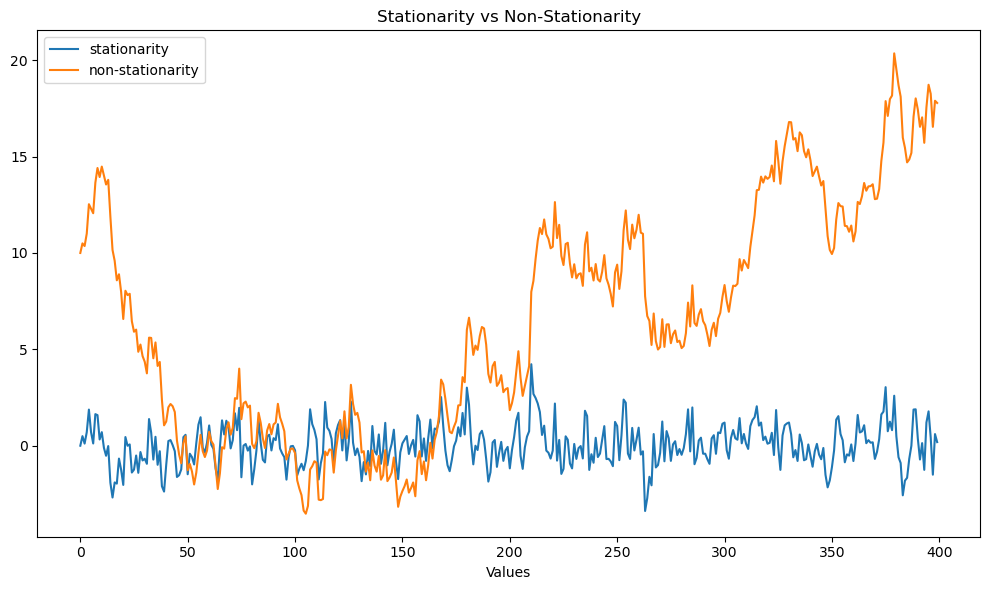

In [123]:
stationarity = simulate_process(True)
non_stationarity = simulate_process(False)

fig, ax = plt.subplots(1,1, figsize = (10,6), dpi = 100)
ax.plot(stationarity, linestyle = '-', label = 'stationarity')
ax.plot(non_stationarity, linestyle = '-', label = 'non-stationarity')
ax.set_xlabel('Timesteps')
ax.set_xlabel('Values')
ax.set_title('Stationarity vs Non-Stationarity')

ax.legend()
plt.tight_layout()
plt.savefig('../figures/stock_figs/stat_vs_nonstat.png', dpi = 100)
plt.show()

/opt/miniconda3/envs/stochastic/lib/python3.14/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/stochastic/lib/python3.14/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


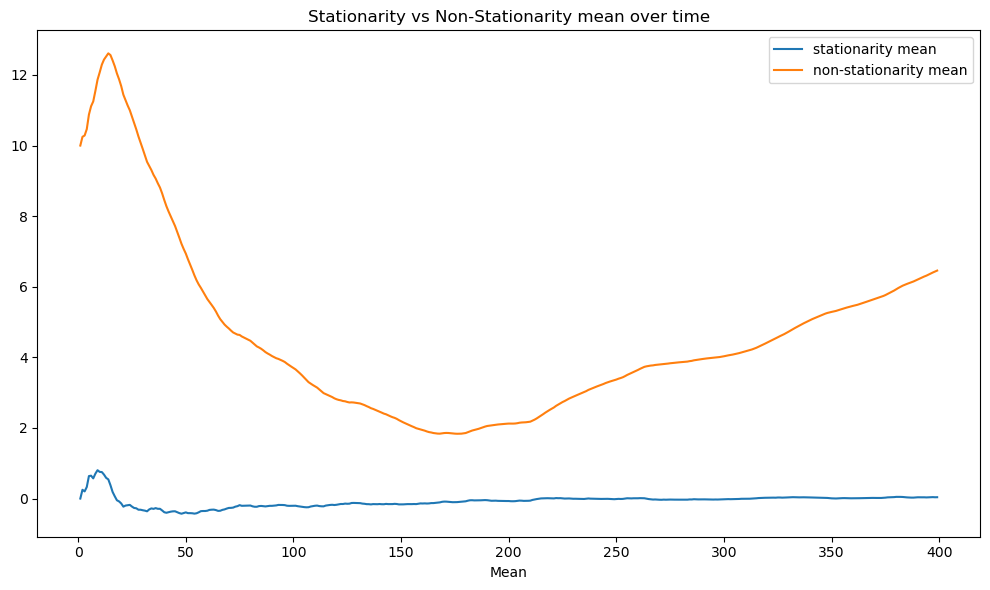

In [124]:
def mean_function(process: np.array) -> np.array:
    mean_func = []

    for i in range(len(process)):
        mean_func.append(np.mean(process[:i]))
    
    return mean_func 

stat_mean = mean_function(stationarity)
non_stat_mean = mean_function(non_stationarity)

fig, ax = plt.subplots(1,1, figsize = (10,6), dpi = 100)
ax.plot(stat_mean, linestyle = '-', label = 'stationarity mean')
ax.plot(non_stat_mean, linestyle = '-', label = 'non-stationarity mean')
ax.set_xlabel('Timesteps')
ax.set_xlabel('Mean')
ax.set_title('Stationarity vs Non-Stationarity mean over time')

ax.legend()
plt.tight_layout()
plt.savefig('../figures/stock_figs/stat_vs_nonstat_mean.png', dpi = 100)
plt.show();

/opt/miniconda3/envs/stochastic/lib/python3.14/site-packages/numpy/_core/fromnumeric.py:4268: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/miniconda3/envs/stochastic/lib/python3.14/site-packages/numpy/_core/_methods.py:180: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/opt/miniconda3/envs/stochastic/lib/python3.14/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


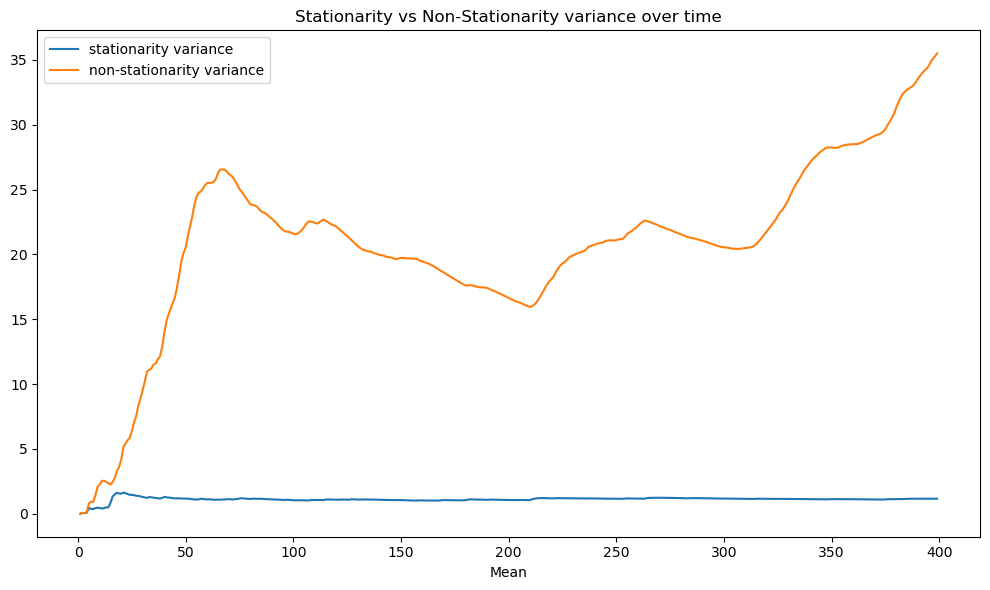

In [125]:
def var_function(process: np.array) -> np.array:
    var_func = []

    for i in range(len(process)):
        var_func.append(np.var(process[:i]))
    
    return var_func 

stat_var = var_function(stationarity)
non_stat_var = var_function(non_stationarity)

fig, ax = plt.subplots(1,1, figsize = (10,6), dpi = 100)
ax.plot(stat_var, linestyle = '-', label = 'stationarity variance')
ax.plot(non_stat_var, linestyle = '-', label = 'non-stationarity variance')
ax.set_xlabel('Timesteps')
ax.set_xlabel('Mean')
ax.set_title('Stationarity vs Non-Stationarity variance over time')

ax.legend()
plt.tight_layout()
plt.savefig('../figures/stock_figs/stat_vs_nonstat_variance.png', dpi = 100)
plt.show();

In [126]:
ADF_res = adfuller(random_walk)

print(len(ADF_res))
print('ADF Statistic:', ADF_res[0])
print('p-value:', ADF_res[1])
print('Number of lags used:', ADF_res[2])
print('Number of observations used:', ADF_res[3])
print('Critical values:', ADF_res[4])
print('IC Best (if autolag):', ADF_res[5])

6
ADF Statistic: -0.9659524876918768
p-value: 0.7654789696692574
Number of lags used: 0
Number of observations used: 999
Critical values: {'1%': np.float64(-3.4369127451400474), '5%': np.float64(-2.864437475834273), '10%': np.float64(-2.568312754566378)}
IC Best (if autolag): 2735.41783678331


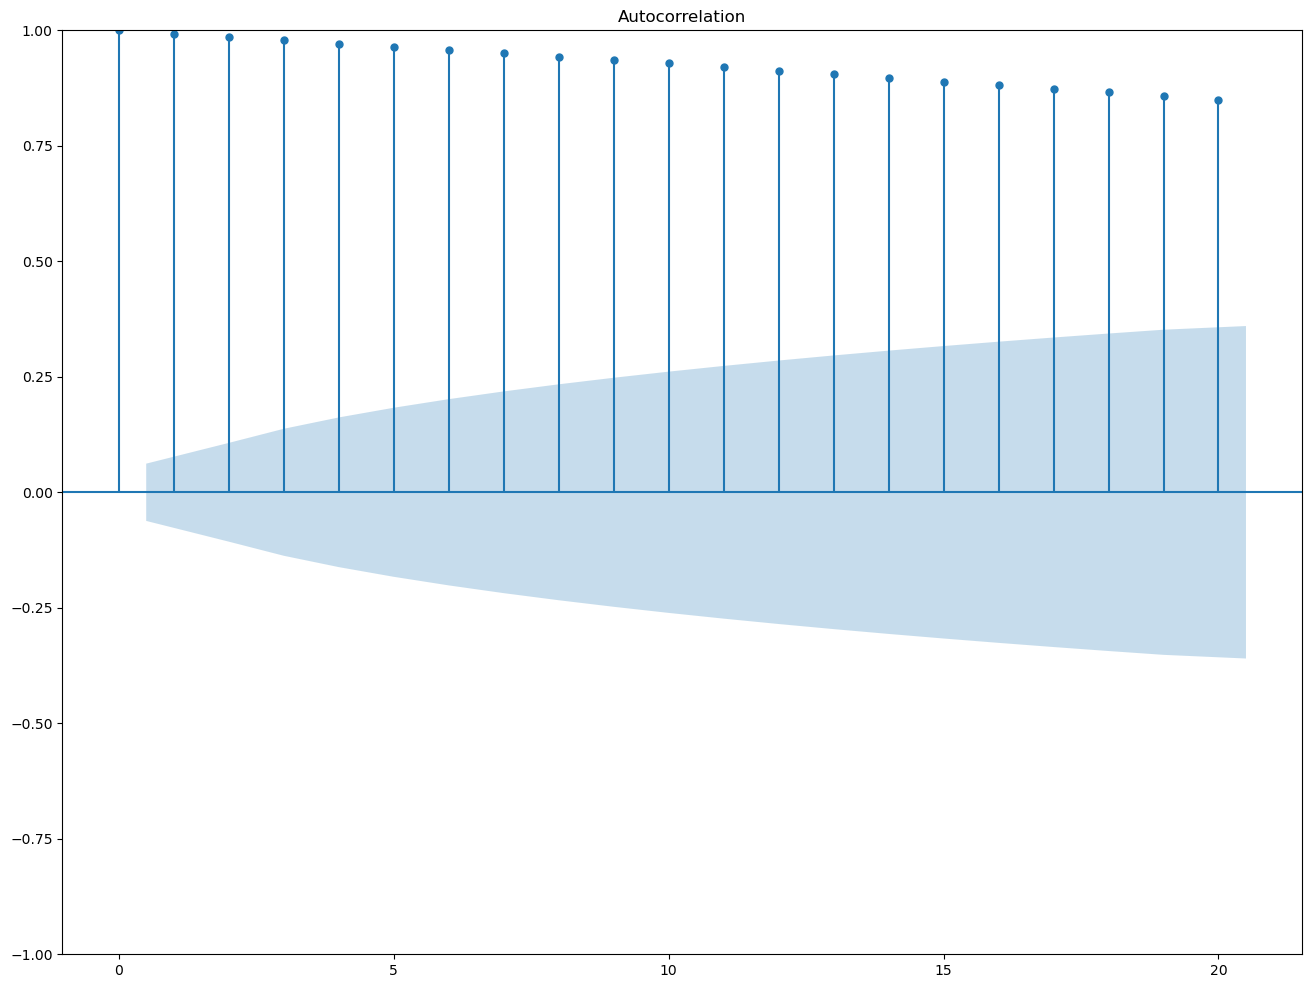

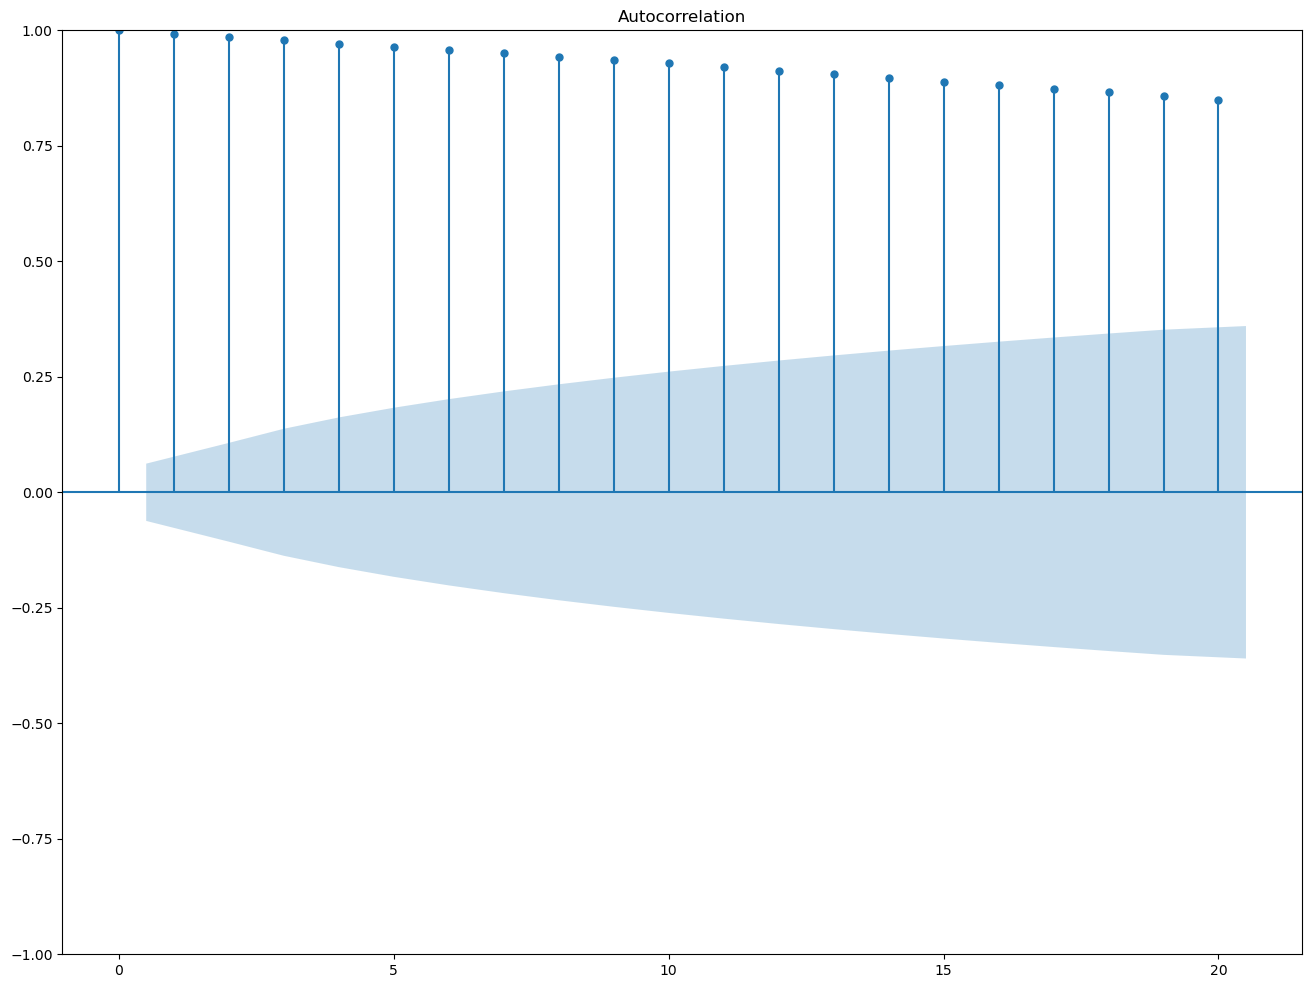

In [127]:
plot_acf(random_walk, lags = 20)

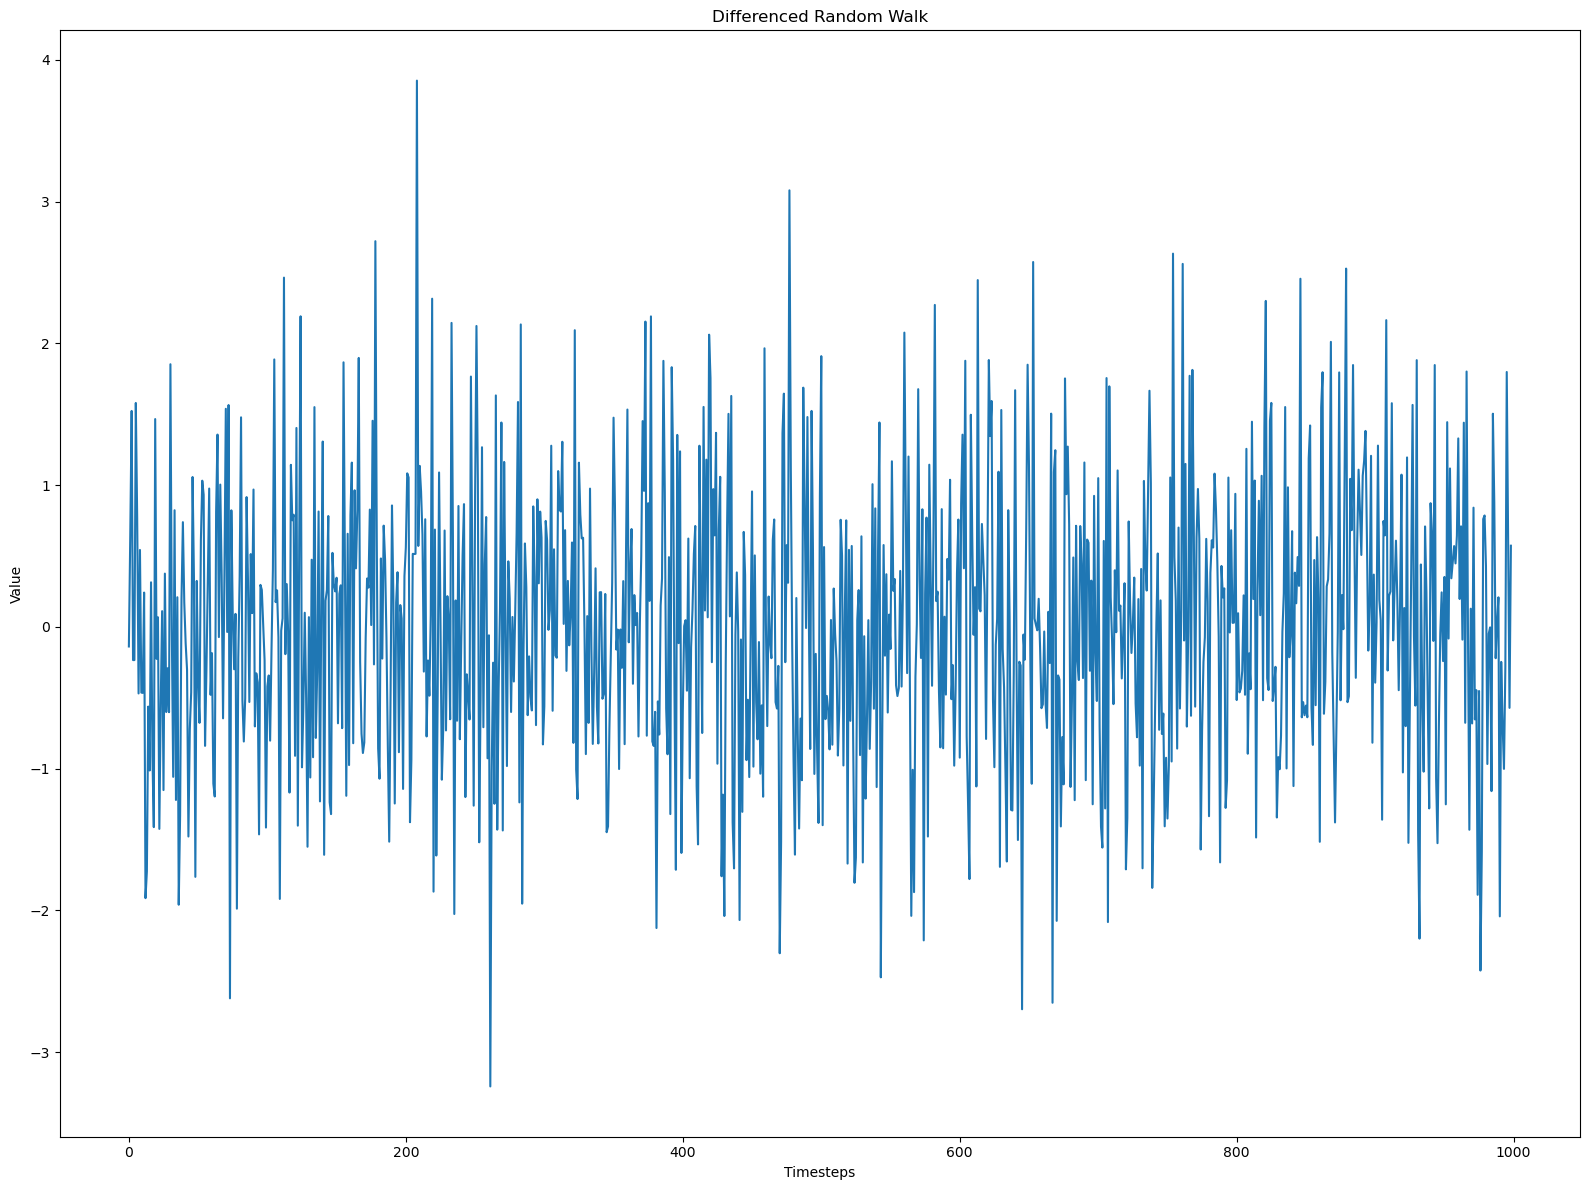

In [128]:
diff_random_walk = np.diff(random_walk, n = 1)

plt.plot(diff_random_walk)

plt.title('Differenced Random Walk')
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.tight_layout()

plt.savefig('../figures/stock_figs/diff_rnd_walk.png', dpi=100)

ADF Statistic: -31.789310857560615
p-value: 0.0


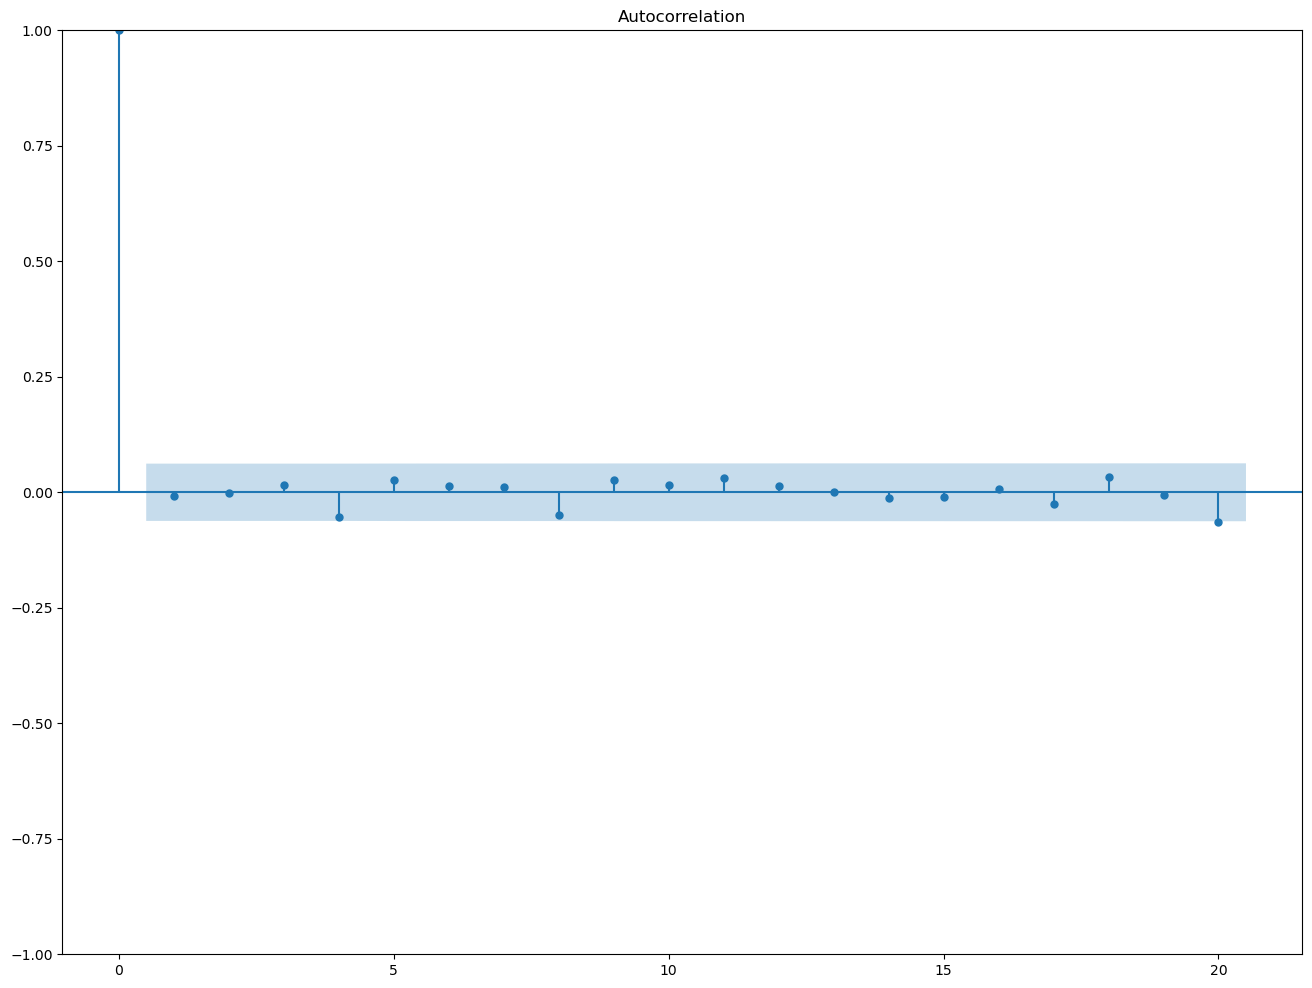

In [129]:
ADF_res = adfuller(diff_random_walk)

print(f'ADF Statistic: {ADF_res[0]}')
print(f'p-value: {ADF_res[1]}')

plot_acf(diff_random_walk, lags=20);